In [35]:
import pandas as pd

# Step 1: Load the HTML file
file_path = '/content/dati-meteo-storici (Cicalino 1).xls'
df = pd.read_html(file_path)[0]

# Step 2: Rename columns for clarity
df.columns = ['DateTime', 'Media Temperatura', 'Temperatura Intervallo Low', 'Temperatura Intervallo High', 'Media Umidità']

# Step 3: Convert 'DateTime' column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

# Step 4: Ensure correct numeric conversion of temperature and humidity values
def correct_decimal(value):
    """Fix incorrect number formatting by inserting a decimal correctly."""
    value = str(value).strip()
    if len(value) > 2 and '.' not in value:  # Avoid already correct values
        return float(value[:2] + '.' + value[2:])
    return float(value)

# Apply the correction function
df['Media Temperatura'] = df['Media Temperatura'].astype(str).apply(correct_decimal)
df['Temperatura Intervallo Low'] = df['Temperatura Intervallo Low'].astype(str).apply(correct_decimal)
df['Temperatura Intervallo High'] = df['Temperatura Intervallo High'].astype(str).apply(correct_decimal)
df['Media Umidità'] = df['Media Umidità'].astype(str).apply(correct_decimal)

# Step 5: Extract the date part only for grouping
df['Date'] = df['DateTime'].dt.date

# Step 6: Calculate the daily averages and max temperature interval
daily_averagesc1 = df.groupby('Date').agg({
    'Media Temperatura': 'mean',
    'Media Umidità': 'mean',
    'Temperatura Intervallo High': 'max',
    'Temperatura Intervallo Low': 'min'
}).reset_index()

# Step 7: Compute the maximum temperature interval
daily_averagesc1['Max Temperature Interval'] = daily_averagesc1['Temperatura Intervallo High'] - daily_averagesc1['Temperatura Intervallo Low']

# Step 8: Rename columns to indicate they are averages
daily_averagesc1 = daily_averagesc1.rename(columns={'Media Temperatura': 'Average Temperatura', 'Media Umidità': 'Average Umidità'})

# Step 9: Check the data
print("Daily Averages with Max Temperature Interval:")
print(daily_averagesc1[['Date', 'Average Temperatura', 'Average Umidità', 'Max Temperature Interval']].head())


Daily Averages with Max Temperature Interval:
         Date  Average Temperatura  Average Umidità  Max Temperature Interval
0  2024-07-05            25.777778        56.674444                      16.2
1  2024-07-06            22.342500        72.247500                      17.0
2  2024-07-07            23.517917        76.728750                      11.5
3  2024-07-08            25.669167        69.143750                      15.6
4  2024-07-09            25.870000        53.647083                      21.0


In [36]:
# Step 4: Extract the date part only for grouping
df['DateTime'] = df['DateTime'].dt.date

# Step 5: Calculate the daily averages
daily_averagesc1 = df.groupby('DateTime').agg({
    'Media Temperatura': 'mean',
    'Media Umidità': 'mean'
}).reset_index()

# Step 6: Rename columns to indicate they are averages
daily_averagesc1.columns = ['DateTime', 'Average Temperatura', 'Average Umidità']

# Step 7: Check the data
print("Daily Averages:")
daily_averagesc1

Daily Averages:


,DateTime,Average Temperatura,Average Umidità
0,2024-07-05,25.777778,56.674444
1,2024-07-06,22.342500,72.247500
2,2024-07-07,23.517917,76.728750
3,2024-07-08,25.669167,69.143750
4,2024-07-09,25.870000,53.647083
5,2024-07-10,26.410000,58.943750
6,2024-07-11,26.262500,54.386250
7,2024-07-12,26.169583,57.745417
8,2024-07-13,25.491667,69.137083
9,2024-07-14,25.960417,68.728750


In [37]:
import pandas as pd

# Step 1: Load the HTML file
file_path = '/content/dati-meteo-storici (Cicalino 2).xls'
df = pd.read_html(file_path)[0]

# Step 2: Rename columns for clarity
df.columns = ['DateTime', 'Media Temperatura', 'Temperatura Intervallo Low', 'Temperatura Intervallo High', 'Media Umidità']

# Step 3: Convert 'DateTime' column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d.%m.%Y %H:%M:%S')

# Step 4: Correct the temperature and humidity values
df['Media Temperatura'] = df['Media Temperatura'].astype(str).str[:2] + '.' + df['Media Temperatura'].astype(str).str[2:]
df['Temperatura Intervallo Low'] = df['Temperatura Intervallo Low'].astype(str).str[:2] + '.' + df['Temperatura Intervallo Low'].astype(str).str[2:]
df['Temperatura Intervallo High'] = df['Temperatura Intervallo High'].astype(str).str[:2] + '.' + df['Temperatura Intervallo High'].astype(str)[2:]
df['Media Umidità'] = df['Media Umidità'].astype(str).str[:2] + '.' + df['Media Umidità'].astype(str).str[2:]

# Step 5: Convert corrected values back to numeric type
df['Media Temperatura'] = pd.to_numeric(df['Media Temperatura'])
df['Temperatura Intervallo Low'] = pd.to_numeric(df['Temperatura Intervallo Low'])
df['Temperatura Intervallo High'] = pd.to_numeric(df['Temperatura Intervallo High'])
df['Media Umidità'] = pd.to_numeric(df['Media Umidità'])

# Step 6: Check the corrected data
print("Corrected Data:")
print(df.head())


Corrected Data:
             DateTime  Media Temperatura  Temperatura Intervallo Low  \
0 2024-07-11 01:00:00              17.00                        17.0   
1 2024-07-11 02:00:00              16.32                        15.7   
2 2024-07-11 03:00:00              15.47                        15.4   
3 2024-07-11 04:00:00              14.67                        14.4   
4 2024-07-11 05:00:00              14.54                        14.4   

   Temperatura Intervallo High  Media Umidità  
0                          NaN          86.60  
1                          NaN          86.83  
2                       15.156          87.32  
3                       15.152          88.19  
4                       14.147          87.45  


In [38]:
# Step 4: Extract the date part only for grouping
df['Date'] = df['DateTime'].dt.date

# Step 5: Calculate the daily averages
daily_averagesc2 = df.groupby('Date').agg({
    'Media Temperatura': 'mean',
    'Media Umidità': 'mean'
}).reset_index()

# Step 6: Rename columns to indicate they are averages
daily_averagesc2.columns = ['Date', 'Average Temperatura', 'Average Umidità']

# Step 7: Check the data
print("Daily Averages:")
print(daily_averagesc2.head())


Daily Averages:
         Date  Average Temperatura  Average Umidità
0  2024-07-11            26.166522        56.061739
1  2024-07-12            26.557917        57.273750
2  2024-07-13            25.907917        67.642083
3  2024-07-14            26.427083        67.367500
4  2024-07-15            27.311250        56.811667


In [39]:
import pandas as pd

# Step 1: Load the HTML file
file_path = '/content/dati-meteo-storici (Imola 1).xls'
df = pd.read_html(file_path)[0]

# Step 2: Rename columns for clarity
df.columns = ['DateTime', 'Media Temperatura', 'Temperatura Intervallo Low', 'Temperatura Intervallo High', 'Media Umidità']

# Step 3: Convert 'DateTime' column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

# Step 4: Ensure correct numeric conversion of temperature and humidity values
def correct_decimal(value):
    """Fix incorrect number formatting by inserting a decimal correctly."""
    value = str(value).strip()
    if len(value) > 2 and '.' not in value:  # Avoid already correct values
        return float(value[:2] + '.' + value[2:])
    return float(value)

# Apply the correction function
df['Media Temperatura'] = df['Media Temperatura'].astype(str).apply(correct_decimal)
df['Temperatura Intervallo Low'] = df['Temperatura Intervallo Low'].astype(str).apply(correct_decimal)
df['Temperatura Intervallo High'] = df['Temperatura Intervallo High'].astype(str).apply(correct_decimal)
df['Media Umidità'] = df['Media Umidità'].astype(str).apply(correct_decimal)

# Step 5: Extract the date part only for grouping
df['Date'] = df['DateTime'].dt.date

# Step 6: Calculate the daily averages and max temperature interval
daily_averagesl1 = df.groupby('Date').agg({
    'Media Temperatura': 'mean',
    'Media Umidità': 'mean',
    'Temperatura Intervallo High': 'max',
    'Temperatura Intervallo Low': 'min'
}).reset_index()

# Step 7: Compute the maximum temperature interval
daily_averagesl1['Max Temperature Interval'] = daily_averagesl1['Temperatura Intervallo High'] - daily_averagesl1['Temperatura Intervallo Low']

# Step 8: Rename columns to indicate they are averages
daily_averagesl1 = daily_averagesl1.rename(columns={'Media Temperatura': 'Average Temperatura', 'Media Umidità': 'Average Umidità'})

# Step 9: Check the data
print("Daily Averages with Max Temperature Interval:")
print(daily_averagesl1[['Date', 'Average Temperatura', 'Average Umidità', 'Max Temperature Interval']].head())


Daily Averages with Max Temperature Interval:
         Date  Average Temperatura  Average Umidità  Max Temperature Interval
0  2024-07-30            29.679167        42.934167                      13.4
1  2024-07-31            29.017083        51.392083                      18.5
2  2024-08-01            31.076667        44.148333                      17.2
3  2024-08-02            27.973750        65.758750                      17.2
4  2024-08-03            25.766667        71.852083                      11.7


In [40]:
import pandas as pd

# Step 1: Load the HTML file
file_path = '/content/dati-meteo-storici (Imola 2).xls'
df = pd.read_html(file_path)[0]

# Step 2: Rename columns for clarity
df.columns = ['DateTime', 'Media Temperatura', 'Temperatura Intervallo Low', 'Temperatura Intervallo High', 'Media Umidità']

# Step 3: Convert 'DateTime' column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d.%m.%Y %H:%M:%S')

# Step 4: Correct the temperature and humidity values
df['Media Temperatura'] = df['Media Temperatura'].astype(str).str[:2] + '.' + df['Media Temperatura'].astype(str).str[2:]
df['Temperatura Intervallo Low'] = df['Temperatura Intervallo Low'].astype(str).str[:2] + '.' + df['Temperatura Intervallo Low'].astype(str).str[2:]
df['Temperatura Intervallo High'] = df['Temperatura Intervallo High'].astype(str).str[:2] + '.' + df['Temperatura Intervallo High'].astype(str)[2:]
df['Media Umidità'] = df['Media Umidità'].astype(str).str[:2] + '.' + df['Media Umidità'].astype(str).str[2:]

# Step 5: Convert corrected values back to numeric type
df['Media Temperatura'] = pd.to_numeric(df['Media Temperatura'])
df['Temperatura Intervallo Low'] = pd.to_numeric(df['Temperatura Intervallo Low'])
df['Temperatura Intervallo High'] = pd.to_numeric(df['Temperatura Intervallo High'])
df['Media Umidità'] = pd.to_numeric(df['Media Umidità'])

# Step 4: Extract the date part only for grouping
df['Date'] = df['DateTime'].dt.date

# Step 5: Calculate the daily averages
daily_averagesl2 = df.groupby('Date').agg({
    'Media Temperatura': 'mean',
    'Media Umidità': 'mean'
}).reset_index()

# Step 6: Rename columns to indicate they are averages
daily_averagesl2.columns = ['Date', 'Average Temperatura', 'Average Umidità']

# Step 7: Check the data
print("Daily Averages:")
print(daily_averagesl2.head())


Daily Averages:
         Date  Average Temperatura  Average Umidità
0  2024-07-30            29.475714        40.637143
1  2024-07-31            28.834583        52.446667
2  2024-08-01            31.059583        43.427500
3  2024-08-02            27.927917        65.880833
4  2024-08-03            25.843333        72.735417


In [41]:
import pandas as pd

# Step 1: Load the HTML file
file_path = '/content/dati-meteo-storici (Imola 3).xls'
df = pd.read_html(file_path)[0]

# Step 2: Rename columns for clarity
df.columns = ['DateTime', 'Media Temperatura', 'Temperatura Intervallo Low', 'Temperatura Intervallo High', 'Media Umidità']

# Step 3: Convert 'DateTime' column to datetime type
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d.%m.%Y %H:%M:%S')

# Step 4: Correct the temperature and humidity values
df['Media Temperatura'] = df['Media Temperatura'].astype(str).str[:2] + '.' + df['Media Temperatura'].astype(str).str[2:]
df['Temperatura Intervallo Low'] = df['Temperatura Intervallo Low'].astype(str).str[:2] + '.' + df['Temperatura Intervallo Low'].astype(str).str[2:]
df['Temperatura Intervallo High'] = df['Temperatura Intervallo High'].astype(str).str[:2] + '.' + df['Temperatura Intervallo High'].astype(str)[2:]
df['Media Umidità'] = df['Media Umidità'].astype(str).str[:2] + '.' + df['Media Umidità'].astype(str).str[2:]

# Step 5: Convert corrected values back to numeric type
df['Media Temperatura'] = pd.to_numeric(df['Media Temperatura'])
df['Temperatura Intervallo Low'] = pd.to_numeric(df['Temperatura Intervallo Low'])
df['Temperatura Intervallo High'] = pd.to_numeric(df['Temperatura Intervallo High'])
df['Media Umidità'] = pd.to_numeric(df['Media Umidità'])

# Step 4: Extract the date part only for grouping
df['Date'] = df['DateTime'].dt.date

# Step 5: Calculate the daily averages
daily_averagesl3 = df.groupby('Date').agg({
    'Media Temperatura': 'mean',
    'Media Umidità': 'mean'
}).reset_index()

# Step 6: Rename columns to indicate they are averages
daily_averagesl3.columns = ['Date', 'Average Temperatura', 'Average Umidità']

# Step 7: Check the data
print("Daily Averages:")
print(daily_averagesl3.head())


Daily Averages:
         Date  Average Temperatura  Average Umidità
0  2024-07-30            29.318333        43.584167
1  2024-07-31            28.716667        52.042917
2  2024-08-01            31.156250        43.788750
3  2024-08-02            27.492917        67.305833
4  2024-08-03            25.540000        72.490000


In [42]:
import pandas as pd

# Step 1: Load the HTML file
file_path = '/content/grafico-delle-catture (Cicalino 1).xls'
df = pd.read_html(file_path)[0]

# Step 2: Convert 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
# Ensure column name has no extra spaces
df.rename(columns=lambda x: x.strip(), inplace=True)

# Replace values in 'Evento' column
df['Evento'] = df['Evento'].replace({'Cleaning': 1}).fillna(0)

# Convert to integer type
df['Evento'] = df['Evento'].astype(int)

# Display the first few rows to verify
print(df.head())


             DateTime  Numero di insetti  Nuove catture (per evento)  \
0 2024-07-06 06:01:00                0.0                         0.0   
1 2024-07-07 06:04:00                0.0                         0.0   
2 2024-07-08 06:03:00                0.0                         0.0   
3 2024-07-09 06:05:00                0.0                         0.0   
4 2024-07-09 06:13:59                NaN                         NaN   

  Recensito  Evento  
0        Si       0  
1        Si       0  
2        Si       0  
3        Si       0  
4        Si       1  


<ipython-input-42-e776baf1b849>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Evento'] = df['Evento'].replace({'Cleaning': 1}).fillna(0)


In [43]:


# Extract the date part for grouping
df['Date'] = df['DateTime'].dt.date

# Step 1: If any row for a given date has Evento = 1, set all rows for that date to 1
df.loc[df['Date'].isin(df.loc[df['Evento'] == 1, 'Date']), 'Evento'] = 1

# Step 2: Remove rows where 'Numero di insetti' is NaN
df = df.dropna(subset=['Numero di insetti'])

# Drop the temporary 'Date' column
dfgc1 = df.drop(columns=['Date'])


dfgc1.head()

,DateTime,Numero di insetti,Nuove catture (per evento),Recensito,Evento
0,2024-07-06 06:01:00,0.0,0.0,Si,0
1,2024-07-07 06:04:00,0.0,0.0,Si,0
2,2024-07-08 06:03:00,0.0,0.0,Si,0
3,2024-07-09 06:05:00,0.0,0.0,Si,1
5,2024-07-10 06:03:00,0.0,0.0,Si,0


In [44]:
import pandas as pd

# Step 1: Load the HTML file
file_path = '/content/grafico-delle-catture (Imola 1).xls'
df = pd.read_html(file_path)[0]

# Step 2: Convert 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
# Ensure column name has no extra spaces
df.rename(columns=lambda x: x.strip(), inplace=True)

# Replace values in 'Evento' column
df['Evento'] = df['Evento'].replace({'Cleaning': 1}).fillna(0)

# Convert to integer type
df['Evento'] = df['Evento'].astype(int)

# Display the first few rows to verify
print(df.head())


             DateTime  Numero di insetti  Nuove catture (per evento)  \
0 2024-07-30 22:01:00                0.0                         0.0   
1 2024-07-31 22:03:00                0.0                         0.0   
2 2024-08-01 22:01:00                0.0                         0.0   
3 2024-08-02 22:03:00                0.0                         0.0   
4 2024-08-03 22:04:00                0.0                         0.0   

  Recensito  Evento  
0        Si       0  
1        Si       0  
2        Si       0  
3        Si       0  
4        Si       0  


<ipython-input-44-c7290f1b8c2d>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Evento'] = df['Evento'].replace({'Cleaning': 1}).fillna(0)


In [45]:


# Extract the date part for grouping
df['Date'] = df['DateTime'].dt.date

# Step 1: If any row for a given date has Evento = 1, set all rows for that date to 1
df.loc[df['Date'].isin(df.loc[df['Evento'] == 1, 'Date']), 'Evento'] = 1

# Step 2: Remove rows where 'Numero di insetti' is NaN
df = df.dropna(subset=['Numero di insetti'])

# Drop the temporary 'Date' column
dfgl1 = df.drop(columns=['Date'])


dfgl1.head()

,DateTime,Numero di insetti,Nuove catture (per evento),Recensito,Evento
0,2024-07-30 22:01:00,0.0,0.0,Si,0
1,2024-07-31 22:03:00,0.0,0.0,Si,0
2,2024-08-01 22:01:00,0.0,0.0,Si,0
3,2024-08-02 22:03:00,0.0,0.0,Si,0
4,2024-08-03 22:04:00,0.0,0.0,Si,0


In [46]:
import pandas as pd

# Step 1: Load the HTML file
file_path = '/content/grafico-delle-catture (Imola 2).xls'
df = pd.read_html(file_path)[0]

# Step 2: Convert 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
# Ensure column name has no extra spaces
df.rename(columns=lambda x: x.strip(), inplace=True)

# Replace values in 'Evento' column
df['Evento'] = df['Evento'].replace({'Cleaning': 1}).fillna(0)

# Convert to integer type
df['Evento'] = df['Evento'].astype(int)

# Display the first few rows to verify
print(df.head())


             DateTime  Numero di insetti  Nuove catture (per evento)  \
0 2024-07-31 00:00:00                0.0                         0.0   
1 2024-08-01 00:01:00                0.0                         0.0   
2 2024-08-02 00:03:00                0.0                         0.0   
3 2024-08-03 00:00:00                0.0                         0.0   
4 2024-08-03 00:12:59                NaN                         NaN   

  Recensito  Evento  
0        Si       0  
1        Si       0  
2        Si       0  
3        Si       0  
4        Si       1  


<ipython-input-46-17ae75c24d58>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Evento'] = df['Evento'].replace({'Cleaning': 1}).fillna(0)


In [47]:


# Extract the date part for grouping
df['Date'] = df['DateTime'].dt.date

# Step 1: If any row for a given date has Evento = 1, set all rows for that date to 1
df.loc[df['Date'].isin(df.loc[df['Evento'] == 1, 'Date']), 'Evento'] = 1

# Step 2: Remove rows where 'Numero di insetti' is NaN
df = df.dropna(subset=['Numero di insetti'])

# Drop the temporary 'Date' column
dfgl2 = df.drop(columns=['Date'])


dfgl1.head()

,DateTime,Numero di insetti,Nuove catture (per evento),Recensito,Evento
0,2024-07-30 22:01:00,0.0,0.0,Si,0
1,2024-07-31 22:03:00,0.0,0.0,Si,0
2,2024-08-01 22:01:00,0.0,0.0,Si,0
3,2024-08-02 22:03:00,0.0,0.0,Si,0
4,2024-08-03 22:04:00,0.0,0.0,Si,0


In [48]:
import pandas as pd

# Step 1: Load the HTML file
file_path = '/content/grafico-delle-catture (Cicalino 2).xls'
df = pd.read_html(file_path)[0]

# Step 2: Convert 'DateTime' column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
# Ensure column name has no extra spaces
df.rename(columns=lambda x: x.strip(), inplace=True)

# Replace values in 'Evento' column
df['Evento'] = df['Evento'].replace({'Cleaning': 1}).fillna(0)

# Convert to integer type
df['Evento'] = df['Evento'].astype(int)

# Display the first few rows to verify
print(df.head())


             DateTime  Numero di insetti  Nuove catture (per evento)  \
0 2024-07-05 11:31:01                0.0                         0.0   
1 2024-07-06 03:02:01                0.0                         0.0   
2 2024-07-07 03:04:01                0.0                         0.0   
3 2024-07-08 03:01:01                0.0                         0.0   
4 2024-07-08 03:10:00                NaN                         NaN   

  Recensito  Evento  
0        Si       0  
1        Si       0  
2        Si       0  
3        Si       0  
4        Si       1  


<ipython-input-48-107e805f788d>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Evento'] = df['Evento'].replace({'Cleaning': 1}).fillna(0)


In [49]:



# Extract the date part for grouping
df['Date'] = df['DateTime'].dt.date

# Step 1: If any row for a given date has Evento = 1, set all rows for that date to 1
df.loc[df['Date'].isin(df.loc[df['Evento'] == 1, 'Date']), 'Evento'] = 1

# Step 2: Remove rows where 'Numero di insetti' is NaN
dfgc2 = df.dropna(subset=['Numero di insetti'])

# Drop the temporary 'Date' column

dfgc2.head()

,DateTime,Numero di insetti,Nuove catture (per evento),Recensito,Evento,Date
0,2024-07-05 11:31:01,0.0,0.0,Si,0,2024-07-05
1,2024-07-06 03:02:01,0.0,0.0,Si,0,2024-07-06
2,2024-07-07 03:04:01,0.0,0.0,Si,0,2024-07-07
3,2024-07-08 03:01:01,0.0,0.0,Si,1,2024-07-08
5,2024-07-09 03:00:01,0.0,0.0,Si,1,2024-07-09


In [50]:

\dfgc1.head()

SyntaxError: unexpected character after line continuation character (<ipython-input-50-e0abbae5dd17>, line 1)

In [51]:
dfgl2

,DateTime,Numero di insetti,Nuove catture (per evento),Recensito,Evento
0,2024-07-31 00:00:00,0.0,0.0,Si,0
1,2024-08-01 00:01:00,0.0,0.0,Si,0
2,2024-08-02 00:03:00,0.0,0.0,Si,0
3,2024-08-03 00:00:00,0.0,0.0,Si,1
5,2024-08-04 00:04:00,0.0,0.0,Si,0
6,2024-08-05 00:00:00,0.0,0.0,Si,0
7,2024-08-06 00:01:00,0.0,0.0,Si,0
8,2024-08-07 00:03:00,0.0,0.0,Si,0
9,2024-08-08 00:04:00,0.0,0.0,Si,0
10,2024-08-09 00:04:00,0.0,0.0,Si,0


In [52]:
# Convert DateTime columns to datetime format
dfgc1['DateTime'] = pd.to_datetime(dfgc1['DateTime']).dt.date
daily_averagesc1['DateTime'] = pd.to_datetime(daily_averagesc1['DateTime']).dt.date

# Merge data frames on DateTime column
merged_df = pd.merge(dfgc1, daily_averagesc1, on='DateTime', how='inner')

merged_df

,DateTime,Numero di insetti,Nuove catture (per evento),Recensito,Evento,Average Temperatura,Average Umidità
0,2024-07-06,0.0,0.0,Si,0,22.342500,72.247500
1,2024-07-07,0.0,0.0,Si,0,23.517917,76.728750
2,2024-07-08,0.0,0.0,Si,0,25.669167,69.143750
3,2024-07-09,0.0,0.0,Si,1,25.870000,53.647083
4,2024-07-10,0.0,0.0,Si,0,26.410000,58.943750
5,2024-07-11,0.0,0.0,Si,0,26.262500,54.386250
6,2024-07-12,0.0,0.0,Si,0,26.169583,57.745417
7,2024-07-13,0.0,0.0,Si,0,25.491667,69.137083
8,2024-07-14,1.0,1.0,Si,0,25.960417,68.728750
9,2024-07-15,1.0,0.0,Si,0,26.975833,57.115833


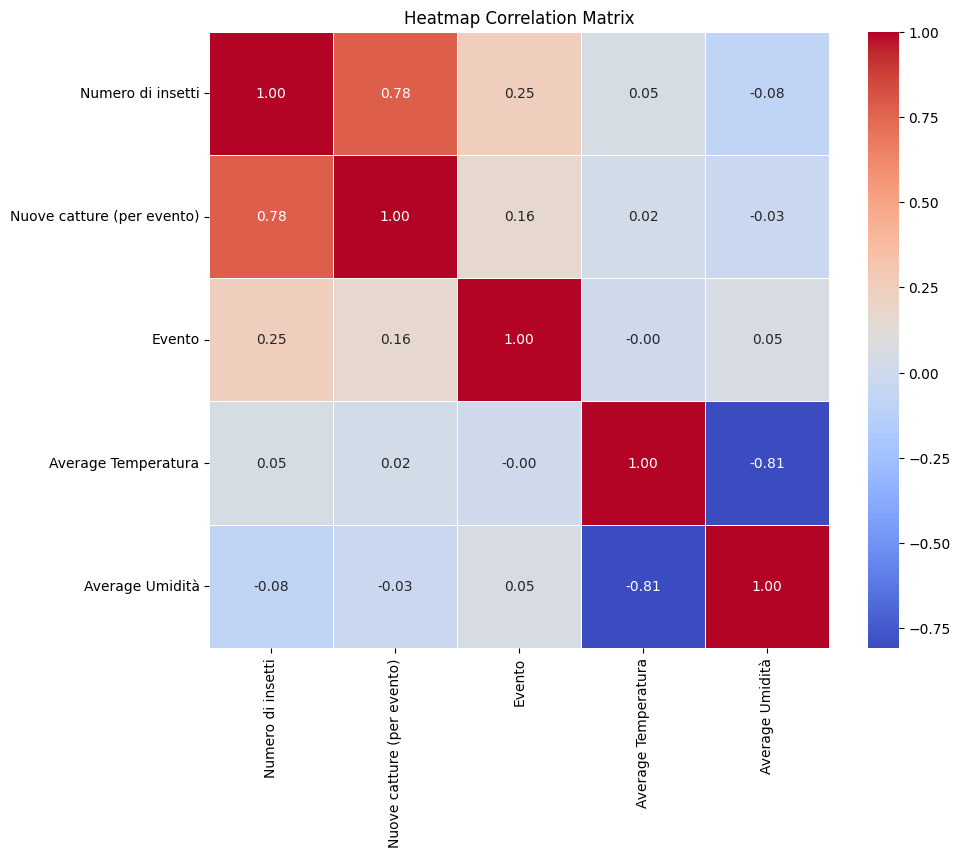

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns (like datetime)
numeric_df = merged_df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title
plt.title("Heatmap Correlation Matrix")

# Show the plot
plt.show()


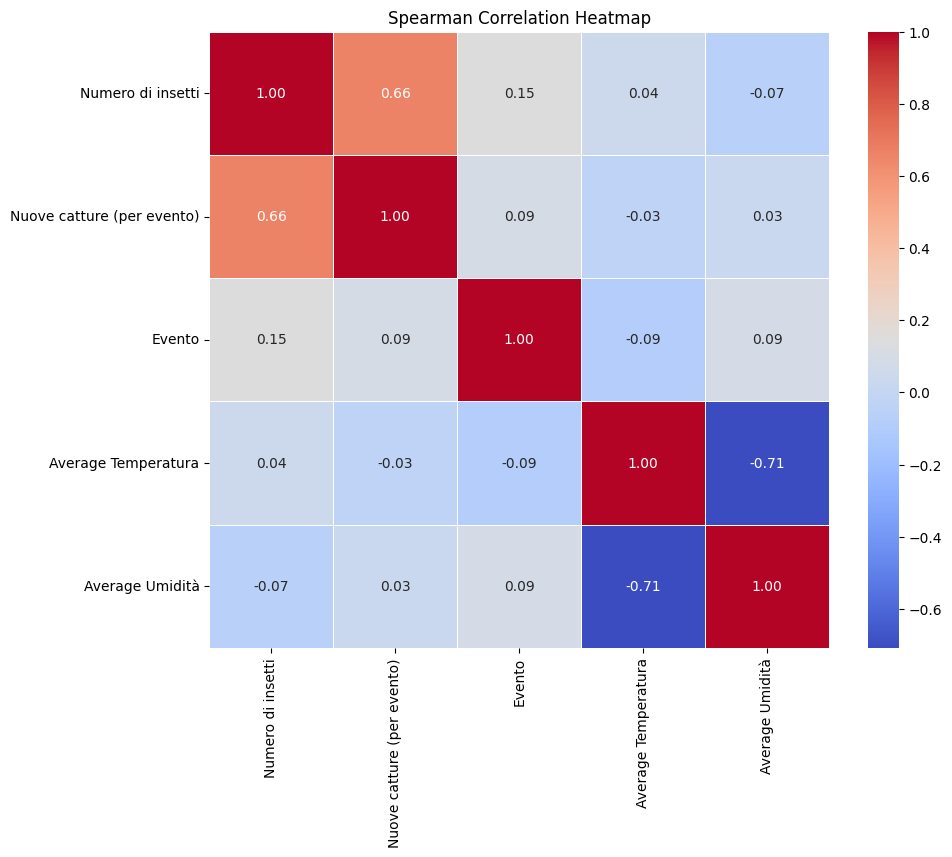

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Drop non-numeric columns (like datetime)
numeric_df = merged_df.select_dtypes(include=['number'])

# Compute the Spearman correlation matrix
spearman_corr = numeric_df.corr(method='spearman')

# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set title
plt.title("Spearman Correlation Heatmap")

# Show the plot
plt.show()


In [55]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats



# Define dependent and independent variables
y = merged_df["Numero di insetti"]
X = merged_df[["Average Temperatura", "Average Umidità" ]]
X = sm.add_constant(X)  # Add intercept

# 1. Poisson Regression
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
print(poisson_model.summary())

# 2. Check Overdispersion (Variance vs. Mean)
mean_count = np.mean(y)
var_count = np.var(y)
print(f"Mean: {mean_count}, Variance: {var_count}")

if var_count > mean_count:
    print("Overdispersion detected! Consider Negative Binomial.")

# 3. Negative Binomial Regression
nb_model = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()
print(nb_model.summary())

# 4. Compare Poisson and Negative Binomial using Log-Likelihood
print(f"Poisson Log-Likelihood: {poisson_model.llf}")
print(f"Negative Binomial Log-Likelihood: {nb_model.llf}")

if nb_model.llf > poisson_model.llf:
    print("Negative Binomial is a better fit than Poisson.")

# 5. Zero-Inflated Poisson and Zero-Inflated Negative Binomial (using statsmodels)
from statsmodels.discrete.count_model import ZeroInflatedPoisson, ZeroInflatedNegativeBinomialP

zip_model = ZeroInflatedPoisson(y, X).fit()
zinb_model = ZeroInflatedNegativeBinomialP(y, X).fit()

print(zip_model.summary())
print(zinb_model.summary())

# Compare model fit
print(f"ZIP Log-Likelihood: {zip_model.llf}")
print(f"ZINB Log-Likelihood: {zinb_model.llf}")

if zinb_model.llf > zip_model.llf:
    print("ZINB is a better fit than ZIP.")


                 Generalized Linear Model Regression Results                  
Dep. Variable:      Numero di insetti   No. Observations:                   49
Model:                            GLM   Df Residuals:                       46
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -41.773
Date:                Wed, 12 Feb 2025   Deviance:                       47.326
Time:                        14:42:42   Pearson chi2:                     50.4
No. Iterations:                     5   Pseudo R-squ. (CS):           0.008077
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.2387    

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3937: RuntimeWarning: invalid value encountered in log
  a1 * np.log(a1) + y * np.log(mu) -
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3938: RuntimeWarning: invalid value encountered in log
  (y + a1) * np.log(a2))
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3974: RuntimeWarning: invalid value encountered in log
  dgterm = dgpart + np.log(a1 / a2) + 1 - a3 / a2
/usr/local/lib/p

         Current function value: nan
         Iterations: 3
         Function evaluations: 115
         Gradient evaluations: 115
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:       Numero di insetti   No. Observations:                   49
Model:             ZeroInflatedPoisson   Df Residuals:                       46
Method:                            MLE   Df Model:                            2
Date:                 Wed, 12 Feb 2025   Pseudo R-squ.:                0.004700
Time:                         14:42:43   Log-Likelihood:                -41.773
converged:                        True   LL-Null:                       -41.970
Covariance Type:             nonrobust   LLR p-value:                    0.8210
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
inflate_const         -37.1777        nan        nan  

/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3937: RuntimeWarning: invalid value encountered in log
  a1 * np.log(a1) + y * np.log(mu) -
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3938: RuntimeWarning: invalid value encountered in log
  (y + a1) * np.log(a2))
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3974: RuntimeWarning: invalid value encountered in log
  dgterm = dgpart + np.log(a1 / a2) + 1 - a3 / a2
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3974: RuntimeWarning: invalid value encountered in log
  dgterm = dgpart + np.log(a1 / a2) + 1 - a3 / a2
/usr/local/lib/python3.11/dist-packages/statsmodels/discrete/discrete_model.py:3937: RuntimeWarning: invalid value encountered in log
  a1 * np.log(a1) + y * np.log(mu) -
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or

In [56]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Prepare your predictors (X) and dependent variable (y)
X = merged_df[["Average Temperatura", "Average Umidità"]]
X = sm.add_constant(X)  # Adds the constant (intercept) to the model
y = merged_df["Numero di insetti"]

# Fit the linear regression model
linear_model = sm.OLS(y, X).fit()

# Print the summary of the linear model
print(linear_model.summary())


                            OLS Regression Results                            
Dep. Variable:      Numero di insetti   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.1784
Date:                Wed, 12 Feb 2025   Prob (F-statistic):              0.837
Time:                        14:42:43   Log-Likelihood:                -49.720
No. Observations:                  49   AIC:                             105.4
Df Residuals:                      46   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.3612    

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare your predictors (X) and dependent variable (y)
X = merged_df[["Average Temperatura", "Average Umidità"]]
y = merged_df["Numero di insetti"]

# Create polynomial features (2nd-degree polynomial)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Print the polynomial regression coefficients
print("Polynomial Regression Coefficients:")
print(poly_model.coef_)

# Predict using the model
y_pred = poly_model.predict(X_poly)

# Print the first few predicted values
print("Predicted values (first 5):")
print(y_pred[:5])


Polynomial Regression Coefficients:
[ 0.00000000e+00  2.85332209e+00  8.05683771e-01 -3.26817117e-02
 -1.70144037e-02 -2.61198086e-03]
Predicted values (first 5):
[-0.02348711  0.27248823  0.49331112  0.4565146  -0.23914803]


In [ ]:
# For Linear Regression Model (from statsmodels)
print("R-squared value:", linear_model.rsquared)


R-squared value: 0.06287189926774017


In [ ]:
# For Polynomial Regression Model (using sklearn)
from sklearn.metrics import r2_score

# Predict the values using the polynomial model
y_pred_poly = poly_model.predict(X_poly)

# Calculate R-squared
r2_poly = r2_score(y, y_pred_poly)
print("Polynomial R-squared:", r2_poly)


Polynomial R-squared: 0.08507119928668094


In [ ]:
Low explanatory power: Both models are not capturing much of the variation in the target variable (the number of insects). This could mean a few things:
for


In [ ]:
df =merged_df

NameError: name 'merged_df' is not defined

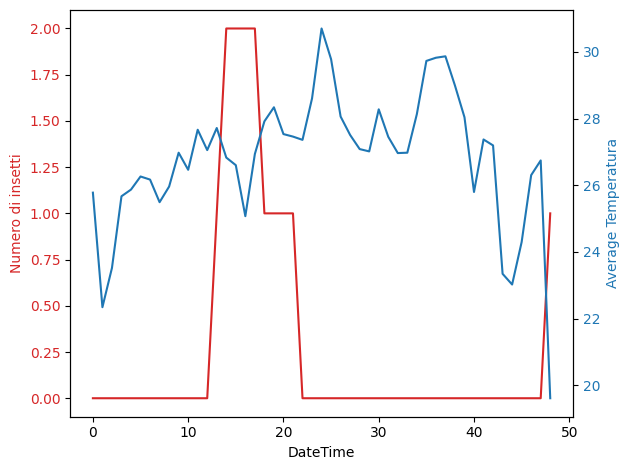

                            OLS Regression Results                            
Dep. Variable:      Numero di insetti   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.543
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.225
Time:                        10:27:12   Log-Likelihood:                -43.402
No. Observations:                  49   AIC:                             92.80
Df Residuals:                      46   BIC:                             98.48
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.0240    

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Set DateTime as the index
df.set_index('DateTime', inplace=False)

# Plot the data
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('DateTime')
ax1.set_ylabel('Numero di insetti', color=color)
ax1.plot(df.index, df['Numero di insetti'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Average Temperatura', color=color)
ax2.plot(df.index, df['Average Temperatura'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# You can also perform a time series regression
y = df['Numero di insetti']
X = df[['Average Temperatura', 'Average Umidità']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

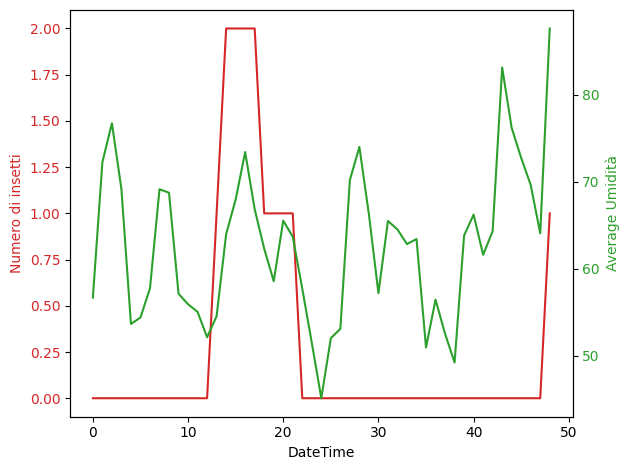

                            OLS Regression Results                            
Dep. Variable:      Numero di insetti   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.328
Date:                Wed, 05 Feb 2025   Prob (F-statistic):              0.134
Time:                        10:27:44   Log-Likelihood:                -43.808
No. Observations:                  49   AIC:                             91.62
Df Residuals:                      47   BIC:                             95.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.6439      0.615     

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


df.set_index('DateTime', inplace=False)


# Plot the data
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('DateTime')
ax1.set_ylabel('Numero di insetti', color=color)
ax1.plot(df.index, df['Numero di insetti'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('Average Umidità', color=color)
ax2.plot(df.index, df['Average Umidità'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# You can also perform a regression analysis
y = df['Numero di insetti']
X = df['Average Umidità']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


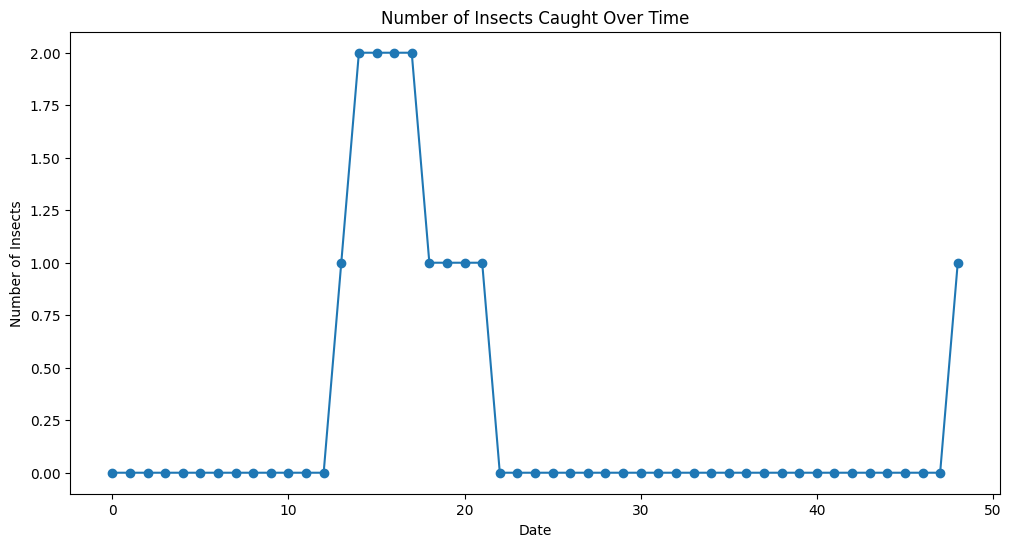

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Numero di insetti'], marker='o', linestyle='-')
plt.title('Number of Insects Caught Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Insects')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Numero di insetti'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -2.203532247910749
p-value: 0.2049659534166126


In [ ]:
dfgc1.head(
)

,DateTime,Numero di insetti,Nuove catture (per evento),Recensito,Evento,Date
0,2024-07-06 06:01:00,0.0,0.0,Si,0,2024-07-06
1,2024-07-07 06:04:00,0.0,0.0,Si,0,2024-07-07
2,2024-07-08 06:03:00,0.0,0.0,Si,0,2024-07-08
3,2024-07-09 06:05:00,0.0,0.0,Si,1,2024-07-09
5,2024-07-10 06:03:00,0.0,0.0,Si,0,2024-07-10


In [ ]:
dfgc1.head()

,DateTime,Numero di insetti,Nuove catture (per evento),Recensito,Evento,Date
0,2024-07-06 06:01:00,0.0,0.0,Si,0,2024-07-06
1,2024-07-07 06:04:00,0.0,0.0,Si,0,2024-07-07
2,2024-07-08 06:03:00,0.0,0.0,Si,0,2024-07-08
3,2024-07-09 06:05:00,0.0,0.0,Si,1,2024-07-09
5,2024-07-10 06:03:00,0.0,0.0,Si,0,2024-07-10


In [27]:
dfgl1.head()

,DateTime,Numero di insetti,Nuove catture (per evento),Recensito,Evento
0,2024-07-30 22:01:00,0.0,0.0,Si,0
1,2024-07-31 22:03:00,0.0,0.0,Si,0
2,2024-08-01 22:01:00,0.0,0.0,Si,0
3,2024-08-02 22:03:00,0.0,0.0,Si,0
4,2024-08-03 22:04:00,0.0,0.0,Si,0


In [ ]:
dfgc1['DateTime'] = pd.to_datetime(dfgc1['DateTime'])
dfgc2['DateTime'] = pd.to_datetime(dfgc2['DateTime'])
dfgc1['Date'] = dfgc1['DateTime'].dt.date
dfgc2['Date'] = dfgc2['DateTime'].dt.date

# Group by date and sum the 'Numero di insetti' column
dfc1_grouped = dfgc1.groupby('Date', as_index=False)['Numero di insetti'].sum()
dfc2_grouped = dfgc2.groupby('Date', as_index=False)['Numero di insetti'].sum()

# Merge the two datasets on the Date column
merged_df = pd.merge(dfc1_grouped, dfc2_grouped, on='Date', how='inner', suffixes=('_dfc1', '_dfc2'))

# Sum the 'Numero di insetti' values from both datasets
merged_df['Total_Numero_di_insetti'] = merged_df['Numero di insetti_dfc1'] + merged_df['Numero di insetti_dfc2']



In [ ]:
merged_df.head()

,Date,Numero di insetti_dfc1,Numero di insetti_dfc2,Total_Numero_di_insetti
0,2024-07-06,0.0,0.0,0.0
1,2024-07-07,0.0,0.0,0.0
2,2024-07-08,0.0,0.0,0.0
3,2024-07-09,0.0,0.0,0.0
4,2024-07-11,0.0,0.0,0.0


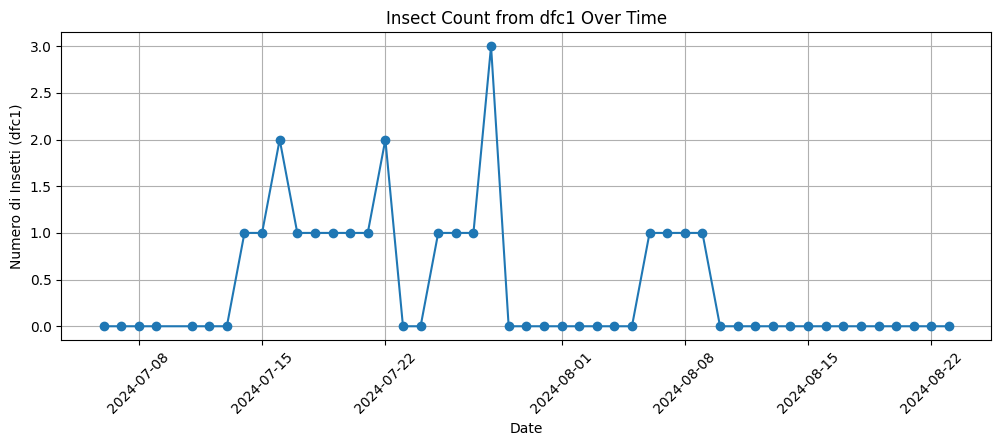

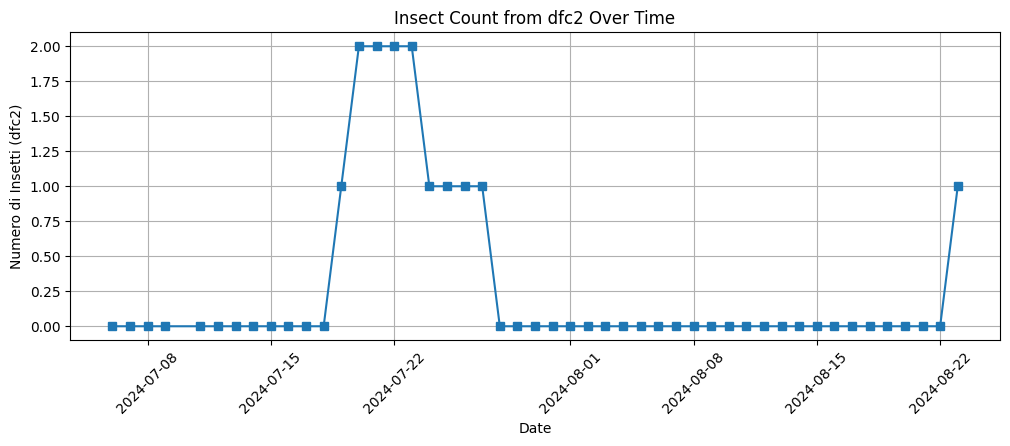

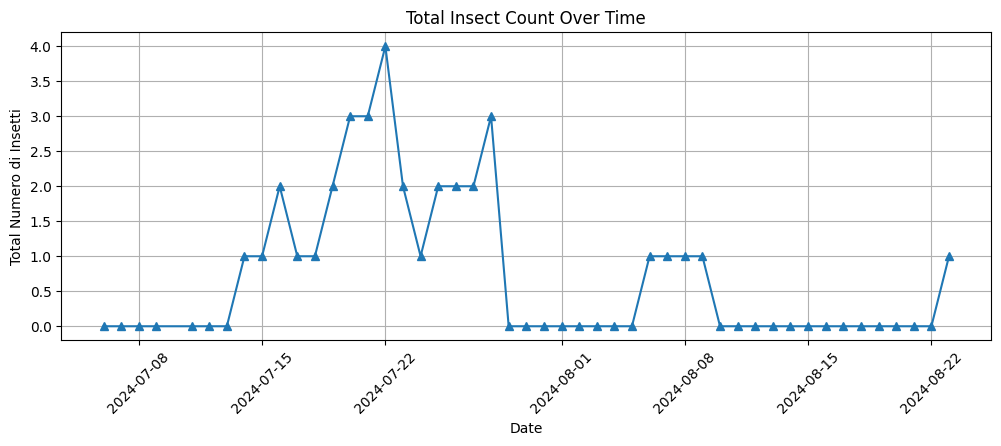

In [ ]:
# Create three separate plots for each dataset and the total count

# Plot for dfc1
plt.figure(figsize=(12, 4))
plt.plot(merged_df['Date'], merged_df['Numero di insetti_dfc1'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Numero di Insetti (dfc1)')
plt.title('Insect Count from dfc1 Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot for dfc2
plt.figure(figsize=(12, 4))
plt.plot(merged_df['Date'], merged_df['Numero di insetti_dfc2'], marker='s', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Numero di Insetti (dfc2)')
plt.title('Insect Count from dfc2 Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot for total insect count
plt.figure(figsize=(12, 4))
plt.plot(merged_df['Date'], merged_df['Total_Numero_di_insetti'], marker='^', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Numero di Insetti')
plt.title('Total Insect Count Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
import scipy.stats as stats

# Compute different correlation coefficients
pearson_corr, _ = stats.pearsonr(merged_df['Numero di insetti_dfc1'], merged_df['Numero di insetti_dfc2'])
spearman_corr, _ = stats.spearmanr(merged_df['Numero di insetti_dfc1'], merged_df['Numero di insetti_dfc2'])
kendall_corr, _ = stats.kendalltau(merged_df['Numero di insetti_dfc1'], merged_df['Numero di insetti_dfc2'])
print (pearson_corr)
print (spearman_corr)
print (kendall_corr)


0.2971847650321294
0.3609315117376661
0.34770243689058733


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(merged_df['Total_Numero_di_insetti'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

ADF Statistic: -2.5315302623871836
p-value: 0.10798991237228206
The series is non-stationary.


In [ ]:
# First-order differencing
merged_df['diff_1'] = merged_df['Total_Numero_di_insetti'].diff().dropna()

# Re-check stationarity
result_diff = adfuller(merged_df['diff_1'].dropna())
print(f'ADF Statistic after differencing: {result_diff[0]}')
print(f'p-value after differencing: {result_diff[1]}')

ADF Statistic after differencing: -1.851987447641469
p-value after differencing: 0.3549735664128363


In [ ]:
# First-order differencing
merged_df['diff_2'] = merged_df['Total_Numero_di_insetti'].diff().diff().dropna()

# Re-check stationarity
result_diff = adfuller(merged_df['diff_2'].dropna())
print(f'ADF Statistic after differencing: {result_diff[0]}')
print(f'p-value after differencing: {result_diff[1]}')

ADF Statistic after differencing: -8.45004337770421
p-value after differencing: 1.671921787496884e-13


In [ ]:
merged_df.head()

,Date,Numero di insetti_dfc1,Numero di insetti_dfc2,Total_Numero_di_insetti,diff_1,diff_2
0,2024-07-06,0.0,0.0,0.0,NaN,NaN
1,2024-07-07,0.0,0.0,0.0,0.0,NaN
2,2024-07-08,0.0,0.0,0.0,0.0,0.0
3,2024-07-09,0.0,0.0,0.0,0.0,0.0
4,2024-07-11,0.0,0.0,0.0,0.0,0.0


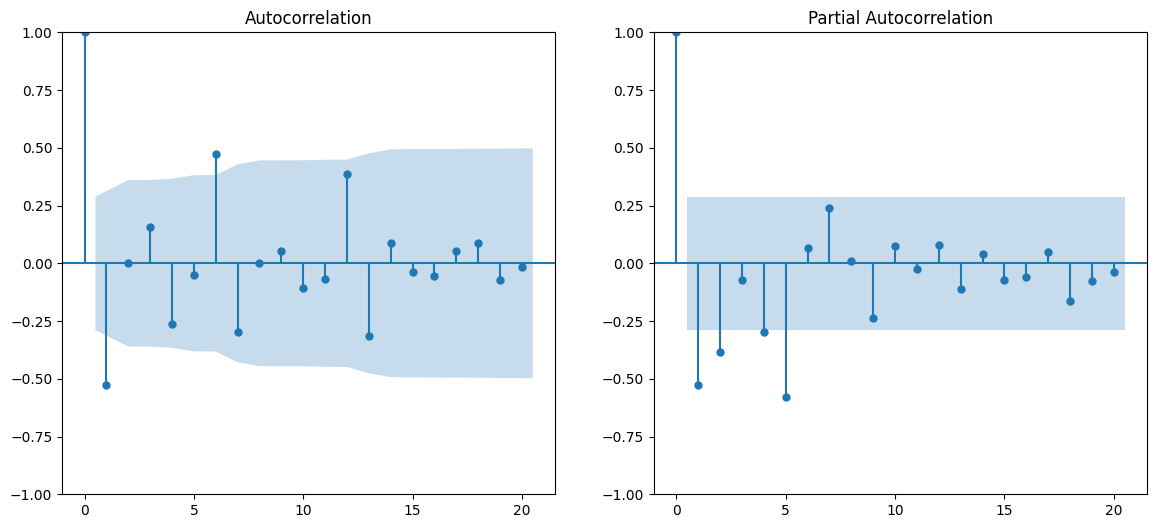

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the second-differenced data
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_acf(merged_df['diff_2'].dropna(), ax=axes[0], lags=20)
plot_pacf(merged_df['diff_2'].dropna(), ax=axes[1], lags=20)
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(merged_df['diff_2'], order=(1, 0, 0))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 diff_2   No. Observations:                   48
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -62.737
Date:                Wed, 12 Feb 2025   AIC                            131.474
Time:                        00:29:27   BIC                            137.087
Sample:                             0   HQIC                           133.595
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0145      0.119      0.122      0.903      -0.219       0.248
ar.L1         -0.5242      0.134     -3.905      0.000      -0.787      -0.261
sigma2         0.8894      0.118      7.556      0.0

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.6 MB/s eta 0:00:00


In [ ]:
import pmdarima as pm

# Fit auto_arima to the original data (not differenced)
model = pm.auto_arima(
    merged_df['Total_Numero_di_insetti'],  # Original time series
    seasonal=False,                # Set to True if your data is seasonal
    start_p=0,                     # Starting value for p
    start_q=0,                     # Starting value for q
    max_p=5,                       # Maximum value for p
    max_q=5,                       # Maximum value for q
    d=None,                        # Let the model determine the order of differencing
    max_d=2,                       # Maximum value for d
    trace=True,                    # Print out the results of the grid search
    error_action='ignore',         # Ignore models that fail to converge
    suppress_warnings=True,        # Suppress convergence warnings
    stepwise=True                  # Use a stepwise approach to speed up the search
)

print(model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=160.903, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=106.311, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=132.055, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=107.901, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=107.844, Time=0.32 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=109.598, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=105.766, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=143.577, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=107.663, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=107.661, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=120.597, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=109.661, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.513 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -49.883
Date:                Wed, 12 Feb 2025   AIC                            105.766
Time:                        00:33:16   BIC                            111.379
Sample:                             0   HQIC                           107.887
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1795      0.208      0.861      0.389      -0.229  

In [ ]:
forecast_steps = 10  # Number of steps to forecast
forecast = results.get_forecast(steps=forecast_steps)

# Confidence intervals
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Total_Numero_di_insetti'], label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Insect Count Forecast')
plt.legend()
plt.show()

                                  SARIMAX Results                                  
Dep. Variable:     Total_Numero_di_insetti   No. Observations:                   48
Model:                      ARIMA(1, 0, 0)   Log Likelihood                 -51.155
Date:                     Wed, 12 Feb 2025   AIC                            106.311
Time:                             00:36:00   BIC                            110.053
Sample:                                  0   HQIC                           107.725
                                      - 48                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8257      0.045     18.240      0.000       0.737       0.914
sigma2         0.4818      0.070      6.889      0.000       0.345       0.619
Ljung-Box (L

In [ ]:
import pmdarima as pm

# Fit auto_arima with seasonal=True
model = pm.auto_arima(
    merged_df['Total_Numero_di_insetti'],  # Original time series
    seasonal=True,                 # Enable seasonal modeling
    m=7,                           # Seasonal period (e.g., 7 for weekly seasonality)
    start_p=0,                     # Starting value for non-seasonal p
    start_q=0,                     # Starting value for non-seasonal q
    max_p=5,                       # Maximum value for non-seasonal p
    max_q=5,                       # Maximum value for non-seasonal q
    start_P=0,                     # Starting value for seasonal P
    start_Q=0,                     # Starting value for seasonal Q
    max_P=2,                       # Maximum value for seasonal P
    max_Q=2,                       # Maximum value for seasonal Q
    d=None,                        # Let the model determine non-seasonal differencing
    D=None,                        # Let the model determine seasonal differencing
    trace=True,                    # Print out the results of the grid search
    error_action='ignore',         # Ignore models that fail to converge
    suppress_warnings=True,        # Suppress convergence warnings
    stepwise=True                  # Use a stepwise approach to speed up the search
)

print(model.summary())

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=143.577, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=106.996, Time=0.11 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=122.363, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,0)[7]             : AIC=160.903, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=105.766, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=106.809, Time=0.06 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=108.286, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=107.663, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=107.661, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=120.597, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=109.661, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[7]             : AIC=106.311, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[7] intercept
Total fit time: 0.696 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -49.883
Date:                Wed, 12 Feb 2025   AIC                            105.766
Time:                        00:38:34   BIC                            111.379
Sample:                             0   HQIC                           107.887
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1795      0.208      0.861      0.389      -0.229  

In [57]:
import pandas as pd

# Convert DateTime columns to datetime format
dfgc1['DateTime'] = pd.to_datetime(dfgc1['DateTime'])
dfgc2['DateTime'] = pd.to_datetime(dfgc2['DateTime'])
dfgl1['DateTime'] = pd.to_datetime(dfgl1['DateTime'])
dfgl2['DateTime'] = pd.to_datetime(dfgl2['DateTime'])

# Extract Date column
dfgc1['Date'] = dfgc1['DateTime'].dt.date
dfgc2['Date'] = dfgc2['DateTime'].dt.date
dfgl1['Date'] = dfgl1['DateTime'].dt.date
dfgl2['Date'] = dfgl2['DateTime'].dt.date

# Group by Date and sum 'Numero di insetti' column
dfc1_grouped = dfgc1.groupby('Date', as_index=False)['Numero di insetti'].sum()
dfc2_grouped = dfgc2.groupby('Date', as_index=False)['Numero di insetti'].sum()
dfl1_grouped = dfgl1.groupby('Date', as_index=False)['Numero di insetti'].sum()
dfl2_grouped = dfgl2.groupby('Date', as_index=False)['Numero di insetti'].sum()

# Merge all datasets on the Date column
merged_df = pd.merge(dfc1_grouped, dfc2_grouped, on='Date', how='inner', suffixes=('_dfc1', '_dfc2'))
merged_df = pd.merge(merged_df, dfl1_grouped, on='Date', how='inner')
merged_df = pd.merge(merged_df, dfl2_grouped, on='Date', how='inner', suffixes=('_dfl1', '_dfl2'))

# Rename columns for clarity
merged_df.rename(columns={'Numero di insetti': 'Numero di insetti_dfl1'}, inplace=True)
merged_df.rename(columns={'Numero di insetti_dfl2': 'Numero di insetti_dfl2'}, inplace=True)

# Calculate the total 'Numero di insetti'
merged_df['Total_Numero_di_insetti'] = (
    merged_df['Numero di insetti_dfc1'] +
    merged_df['Numero di insetti_dfc2'] +
    merged_df['Numero di insetti_dfl1'] +
    merged_df['Numero di insetti_dfl2']
)

# Display the final DataFrame
merged_df

<ipython-input-57-c32a055b9fa0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgc2['DateTime'] = pd.to_datetime(dfgc2['DateTime'])
<ipython-input-57-c32a055b9fa0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgc2['Date'] = dfgc2['DateTime'].dt.date


,Date,Numero di insetti_dfc1,Numero di insetti_dfc2,Numero di insetti_dfl1,Numero di insetti_dfl2,Total_Numero_di_insetti
0,2024-07-31,0.0,0.0,0.0,0.0,0.0
1,2024-08-01,0.0,0.0,0.0,0.0,0.0
2,2024-08-02,0.0,0.0,0.0,0.0,0.0
3,2024-08-03,0.0,0.0,0.0,0.0,0.0
4,2024-08-04,0.0,0.0,0.0,0.0,0.0
5,2024-08-06,1.0,0.0,0.0,0.0,1.0
6,2024-08-07,1.0,0.0,0.0,0.0,1.0
7,2024-08-08,1.0,0.0,0.0,0.0,1.0
8,2024-08-09,1.0,0.0,0.0,0.0,1.0
9,2024-08-10,0.0,0.0,0.0,0.0,0.0


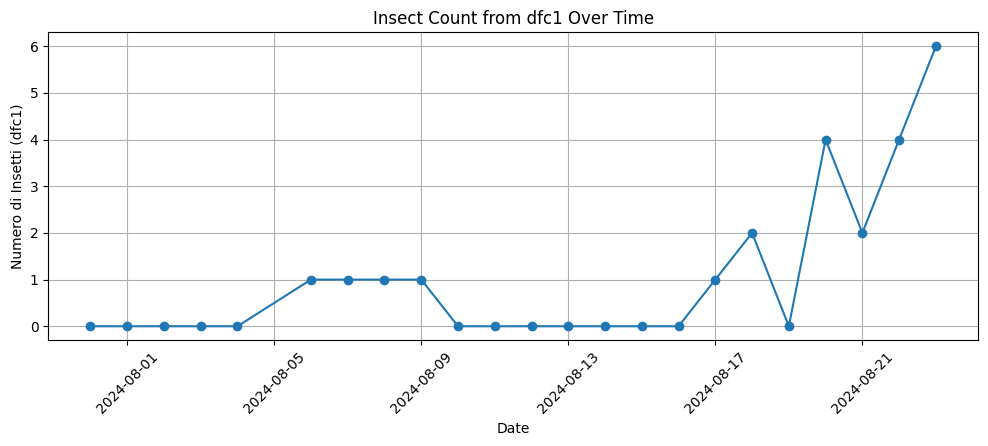

In [32]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(merged_df['Date'], merged_df['Total_Numero_di_insetti'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Numero di Insetti (dfc1)')
plt.title('Insect Count from dfc1 Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [33]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(merged_df['Total_Numero_di_insetti'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

ADF Statistic: 0.149878413543666
p-value: 0.9693060935581174
The series is non-stationary.


In [34]:
# First-order differencing
merged_df['diff_1'] = merged_df['Total_Numero_di_insetti'].diff().dropna()

# Re-check stationarity
result_diff = adfuller(merged_df['diff_1'].dropna())
print(f'ADF Statistic after differencing: {result_diff[0]}')
print(f'p-value after differencing: {result_diff[1]}')

ADF Statistic after differencing: -5.936231992194535
p-value after differencing: 2.3174402740207387e-07


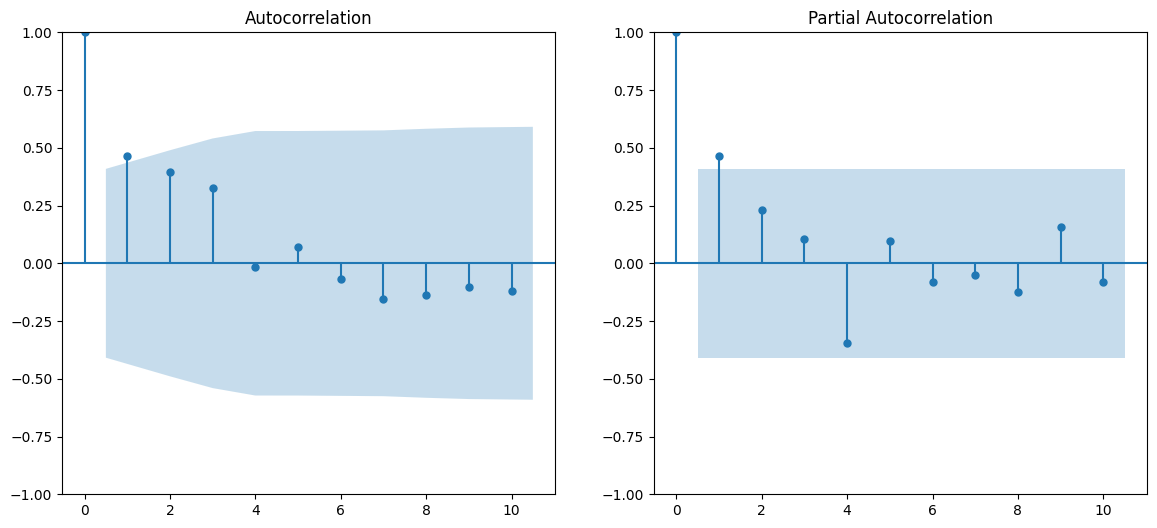

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the second-differenced data
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_acf(merged_df['Total_Numero_di_insetti'].dropna(), ax=axes[0], lags=10)
plot_pacf(merged_df['Total_Numero_di_insetti'].dropna(), ax=axes[1], lags=10)
plt.show()

In [39]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(merged_df['Total_Numero_di_insetti'], order=(3, 1, 3))
results = model.fit()

print(results.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                  SARIMAX Results                                  
Dep. Variable:     Total_Numero_di_insetti   No. Observations:                   23
Model:                      ARIMA(3, 1, 3)   Log Likelihood                 -28.317
Date:                     Wed, 12 Feb 2025   AIC                             70.635
Time:                             11:17:00   BIC                             78.272
Sample:                                  0   HQIC                            72.434
                                      - 23                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3711      1.259     -0.295      0.768      -2.839       2.097
ar.L2          0.2796      0.736      0.380      0.704      -1.163       1.722
ar.L3       